In [13]:
PATH_PREFIX = '../../../'
import sys
sys.path.append(PATH_PREFIX)

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import math
import yaml
import csv
from utils.plot import *
from utils.fitness_controller import FitnessController
from compress_optim import CompressConfig, load_comp_config, fit_from_vals

In [15]:
PREC = 'f2'
SAVE_PLOT = True

In [16]:
plt_data = pd.read_csv(os.path.join(PATH_PREFIX, f'results/mobilenet_compress_120_{PREC}/run1/GA_save.csv'))

with open(os.path.join(PATH_PREFIX, f'results/mobilenet_compress_120_{PREC}/experiment_setting.yaml'), 'r') as config:
    load_comp_config(yaml.safe_load(config))
    
fit_cont = FitnessController(CompressConfig.OPTIM_TARGET, None, fit_from_vals, target_update_offset=CompressConfig.OPTIM_TARGET_UPDATE_OFFSET, 
    target_limit=CompressConfig.OPTIM_TARGET_LOW_LIMIT, lock=CompressConfig.OPTIM_TARGET_LOCK)

fit_cont.fit_from_df(plt_data, verbose=True)

plt_data

Fitness target update to [0.825     4.8907085]


,generation,chromosome,accuracy,accuracy_loss,compression,share_t,train_t,acc_t,fitness
0,0,"[103, 96, 81, 55, 75, 96, 53, 89, 106, 77, 30,...",0.744178,0.085881,4.653185,330.49414,0.0,72.397360,9.145446
1,0,"[103, 95, 109, 94, 109, 84, 58, 110, 107, 37, ...",0.740175,0.089884,4.678902,312.69144,0.0,83.822180,8.963207
2,0,"[118, 95, 100, 67, 85, 116, 34, 117, 99, 90, 1...",0.770015,0.060044,4.749462,335.37558,0.0,69.097420,13.767037
3,0,"[118, 96, 57, 30, 114, 70, 111, 104, 118, 112,...",0.755459,0.074600,4.720724,350.30807,0.0,76.458145,10.967651
4,0,"[95, 95, 120, 111, 97, 104, 81, 103, 63, 69, 3...",0.748544,0.081514,4.734153,323.03350,0.0,78.954220,10.199274
...,...,...,...,...,...,...,...,...,...
703,58,"[105, 96, 57, 86, 94, 106, 111, 120, 100, 118,...",0.788937,0.041121,4.732706,356.17630,0.0,72.159370,18.397525
704,58,"[92, 96, 57, 86, 94, 106, 111, 120, 100, 118, ...",0.787118,0.042940,4.748914,319.11760,0.0,72.765236,18.414598
705,58,"[105, 96, 57, 86, 105, 106, 111, 120, 100, 118...",0.789665,0.040393,4.694285,360.52847,0.0,72.497600,17.031432
706,58,"[105, 96, 57, 86, 94, 106, 111, 120, 100, 118,...",0.788574,0.041485,4.653031,342.64633,0.0,70.606110,15.229941


In [17]:
plt_data[plt_data['fitness'] == plt_data['fitness'].max()]

,generation,chromosome,accuracy,accuracy_loss,compression,share_t,train_t,acc_t,fitness
684,57,"[105, 96, 57, 86, 94, 106, 111, 120, 100, 118,...",0.805313,0.024745,4.761727,343.69653,0.0,75.37644,28.116401
696,58,"[105, 96, 57, 86, 94, 106, 111, 120, 100, 118,...",0.805313,0.024745,4.761727,0.00000,0.0,0.00000,28.116401


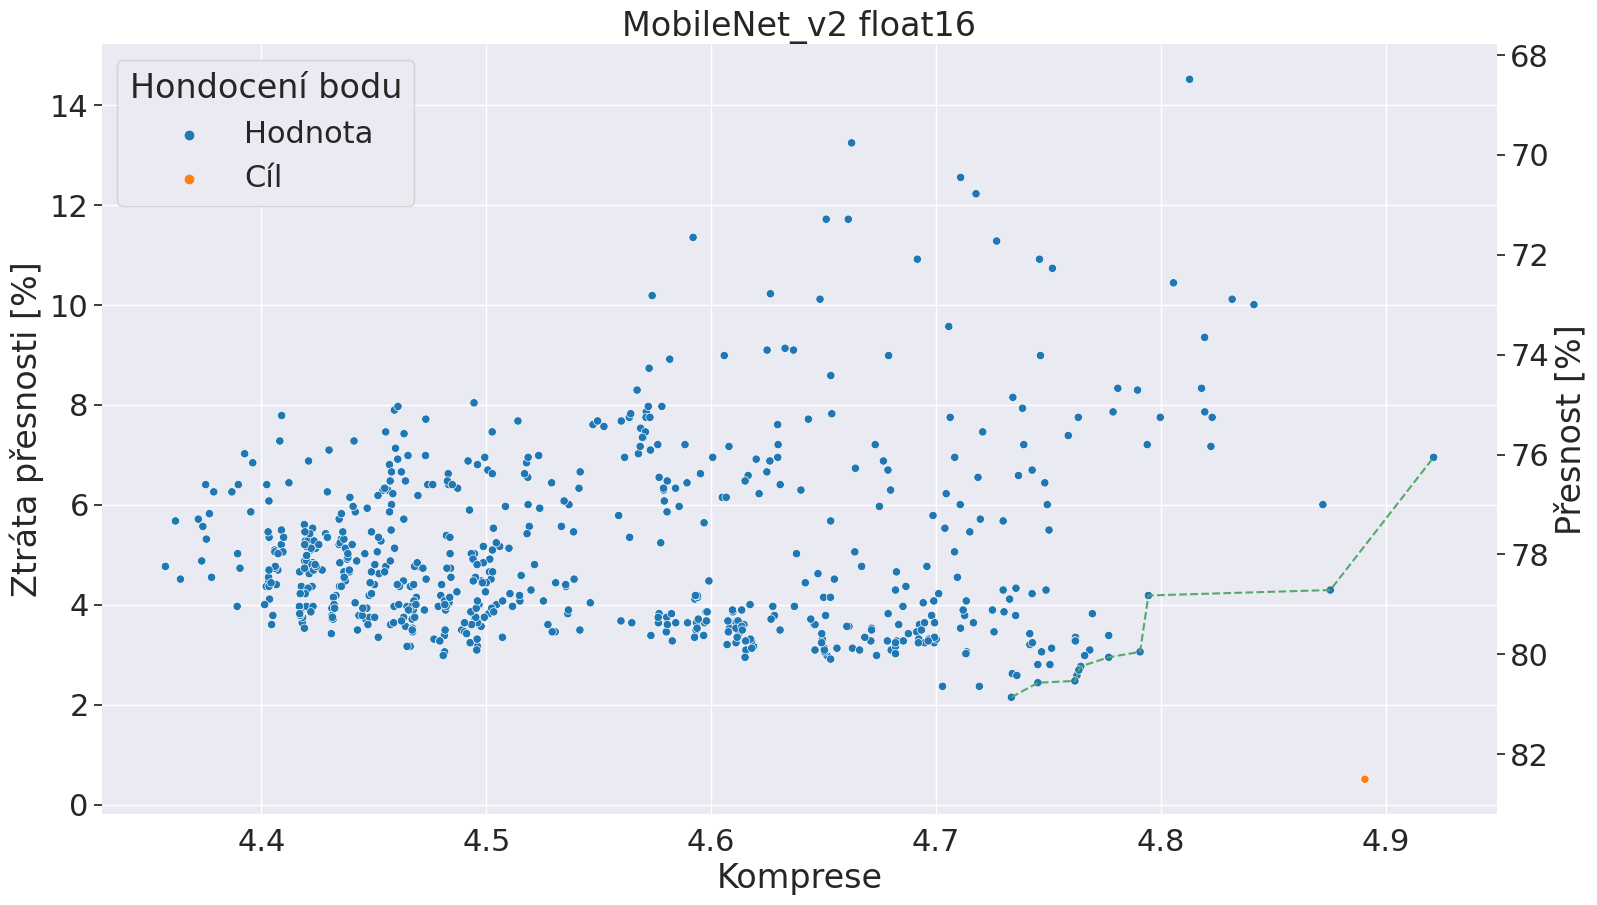

In [18]:
plot_alcr(plt_data, pareto=True, target=fit_cont.targ)

plt.title(f'MobileNet_v2 {"float32" if PREC == "f4" else "float16"}')

if SAVE_PLOT:
    os.makedirs(os.path.join(PATH_PREFIX, f'results/graphs/mobilenet/search_space'), exist_ok=True)
    plt.savefig(os.path.join(PATH_PREFIX, f'results/graphs/mobilenet/search_space/mobilenet_v2_{PREC}.pdf'))